# Load binary data

In [19]:
import os 
import pandas as pd
import numpy as np
import h5py
import json
from numpy import nan
from datetime import datetime, timedelta, date
from fractions import Fraction
from time import mktime
import time
import requests
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [20]:
def load_from_checkpoint(checkpoint_name):
    if os.path.isfile(checkpoint_name):
        return pd.read_hdf(checkpoint_name,'table')

In [21]:
binary_df = load_from_checkpoint('./checkpoints/data_binary_encoded.h5')

### drop the regression data

In [22]:
binary_df = binary_df.drop(["week", "day", "month", "minute", "second", "outside_temperature"], axis=1)

# Explore the binary data to get a sense of the values we are dealing with

### Describe the data

In [23]:
binary_df.describe()

,hour,sun,event_Active Fan LevelHigh,event_Active Fan LevelOff,event_Auto ModeDisabled,event_Auto ModeEnabled,event_Cool Stage 1Active,event_Cool Stage 1Inactive,event_DoorLockLock,event_DoorLockUnlock,event_FanAuto,event_FanOn,event_Floor WarmingHeat:False,event_Floor WarmingOff:False,event_Floor WarmingOff:True,event_GraceOccupancyDetected,event_Heat Stage 1Active,event_Heat Stage 1Inactive,event_HoldOff,event_HoldOn,event_Humidifier OffActive,event_Humidifier OffInactive,event_OccupancyDetected,event_VacancyDetected
count,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000
mean,10.192733,0.222275,0.002155,0.002211,0.000074,0.000074,0.002252,0.002244,0.000369,0.000028,0.000011,0.000024,0.000074,0.000074,0.000074,0.000278,0.006636,0.006623,0.000012,0.000012,0.000074,0.000074,0.027316,0.027306
std,7.275663,0.415775,0.046369,0.046972,0.008612,0.008612,0.047407,0.047320,0.019194,0.005316,0.003255,0.004853,0.008612,0.008612,0.008612,0.016667,0.081192,0.081113,0.003431,0.003431,0.008612,0.008612,0.163002,0.162975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### plot the data

In [24]:
def plot_events_by_time(df, cols=[]):
    # plot all cols, if cols not specified
    df = df.copy()
    if cols:
        binary_plot = binary_df.groupby('hour')[cols].sum()
    else:
        binary_plot = binary_df.groupby('hour').sum()
    binary_plot.plot()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

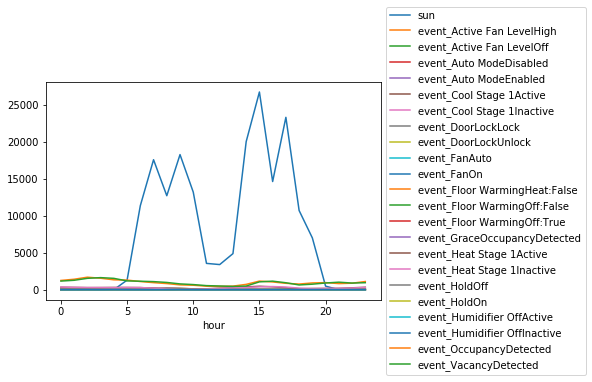

In [26]:
plot_events_by_time(binary_df)

### sun values are much higher, drop it and reevaluate

In [27]:
binary_df = binary_df.drop(["sun"], axis=1)

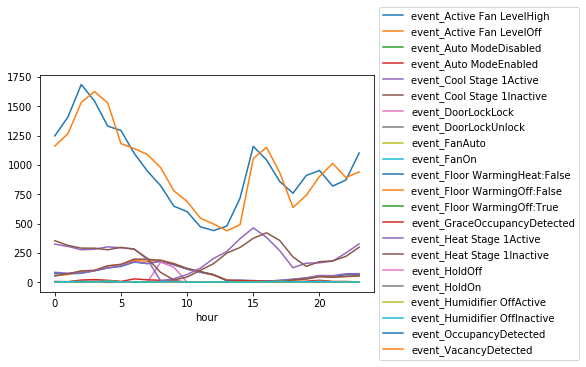

In [28]:
plot_events_by_time(binary_df)

### Pairwise plot to see the relationship between 2 variables

In [29]:
def pairwise_plot(df, cols):
    sns.pairplot(df[cols])
    plt.show()

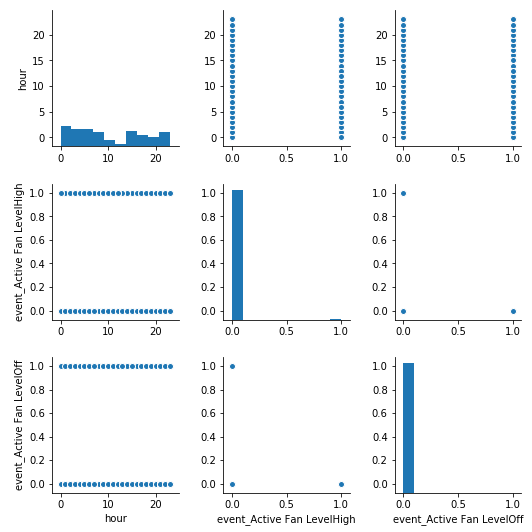

In [31]:
# these values are randomly selected columns, but cannot do all of them at the same time because it takes a long time
pairwise_plot(binary_df, ['hour', 'event_Active Fan LevelHigh', 'event_Active Fan LevelOff'])